<a href="https://colab.research.google.com/github/PranavReddyy/Labs-IIITH/blob/main/%5B14%5D_AIML_Module_04_Lab_02_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

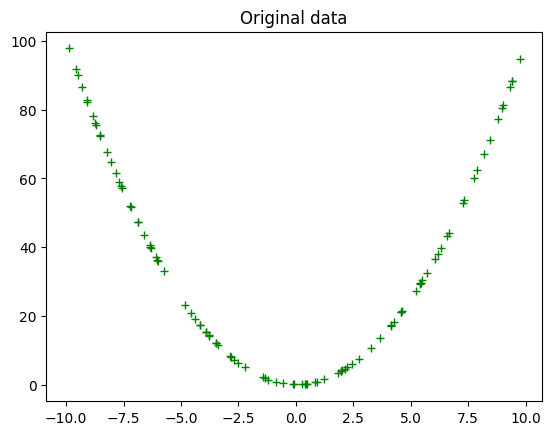

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


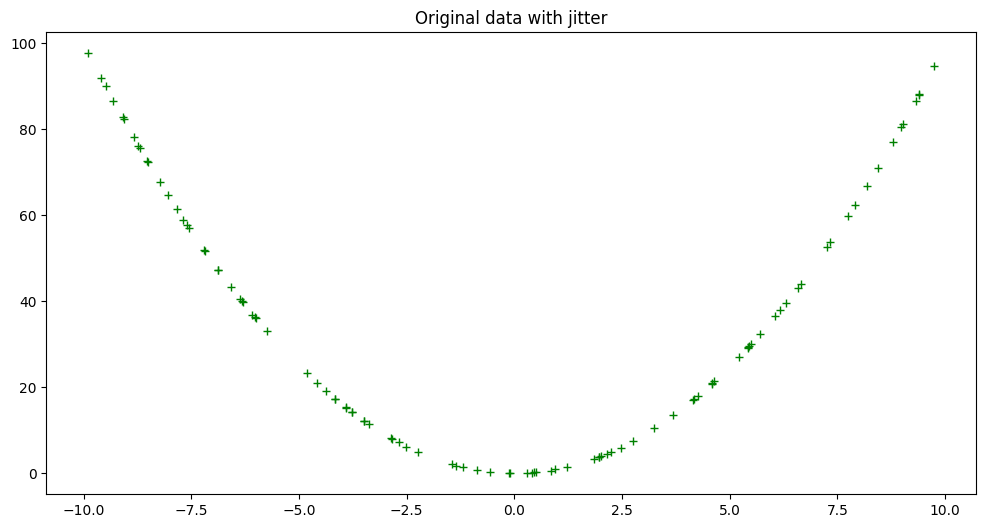

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

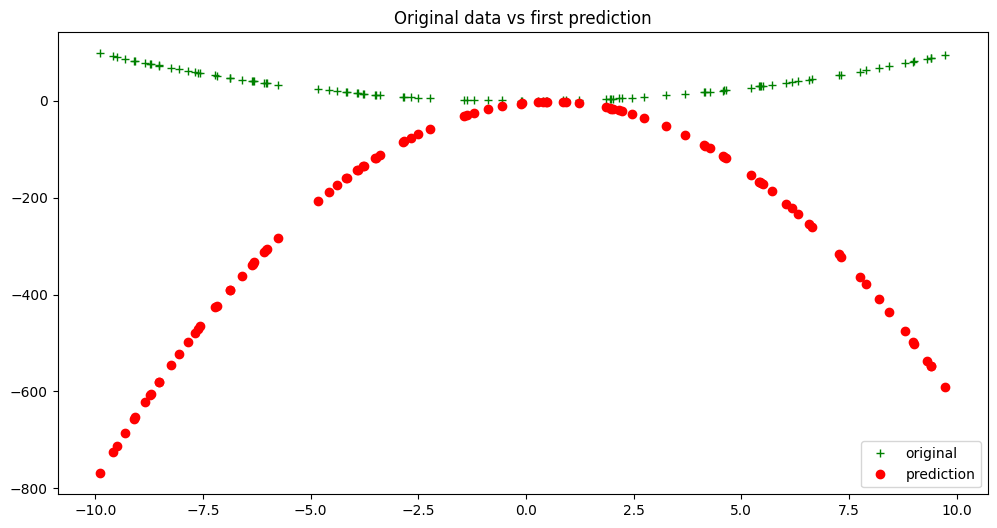

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


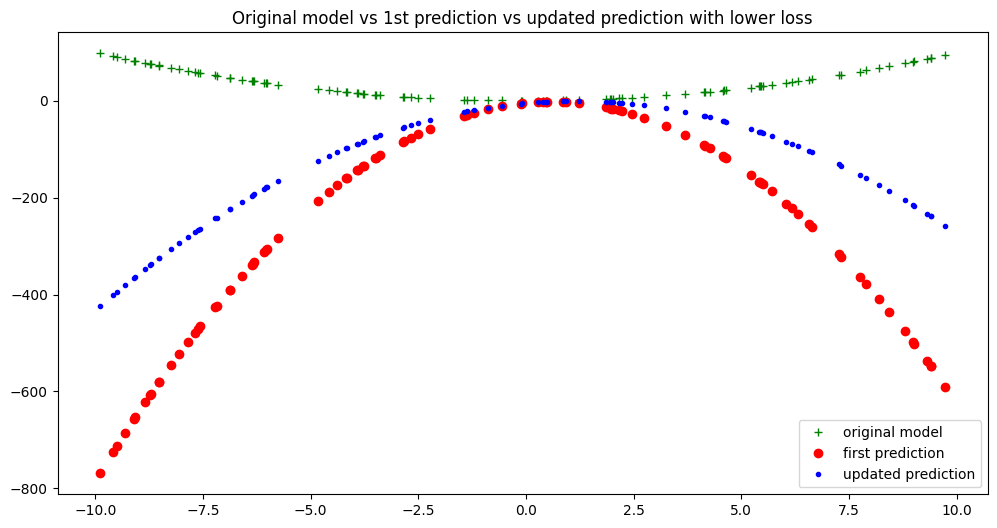

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [14]:
GD = gradient_descent(30000, 0.0003)


[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

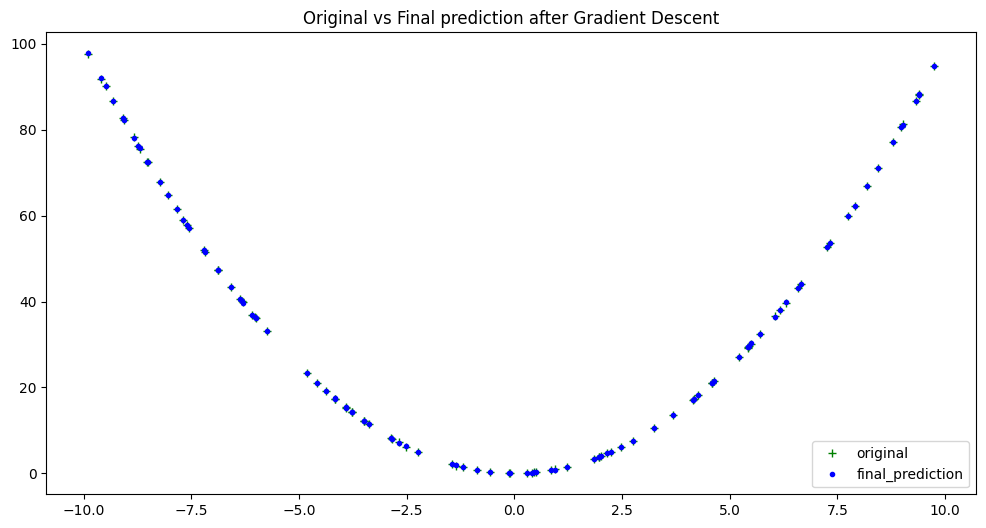

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


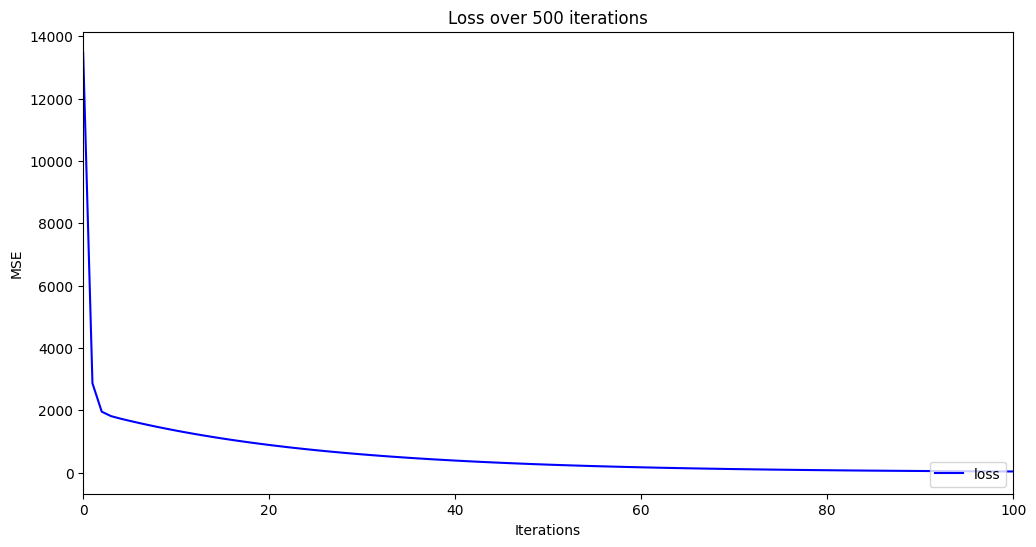

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.




[18498.114116291363, 4893.088016428502, 3678.0471671553014, 3447.191705467293, 3299.6048921138427, 3163.9158958946996, 3034.269798318796, 2909.9942683676236, 2790.8348672454194, 2676.578440527654, 2567.023037783111, 2461.9752103587252, 2361.24948457753, 2264.6680196179414, 2172.0602923422116, 2083.262796109651, 1998.1187520630137, 1916.4778323008643, 1838.1958944410383, 1763.134727106016, 1691.1618058807765, 1622.1500593122112, 1555.97764453693, 1492.5277321412782, 1431.6882998736737, 1373.3519348450445, 1317.4156438680857, 1263.7806716004673, 1212.352326170865, 1163.039811979937, 1115.7560693810165, 1070.4176209574264, 1026.9444241250153, 985.2597297996158, 945.2899468799079, 906.9645123063731, 870.2157664669223, 834.9788337291841, 801.191507888511, 768.7941423294455, 737.7295447066932, 707.942875959636, 679.3815534820918, 651.9951582763201, 625.7353459273577, 600.555761240475, 576.4119563910332, 553.2613124422178, 531.0629640920658, 509.7777275169229, 489.3680311839082, 469.797849510

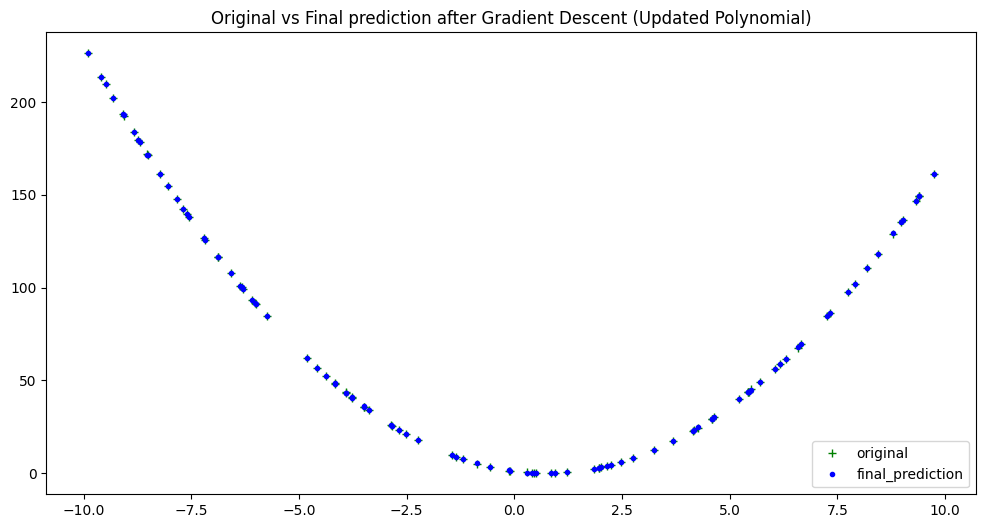

Final Coefficients predicted: (2.0000690481768744, -3.0000503521700255, 1.009044659432737)
Original Coefficients: [2, -3, 1]


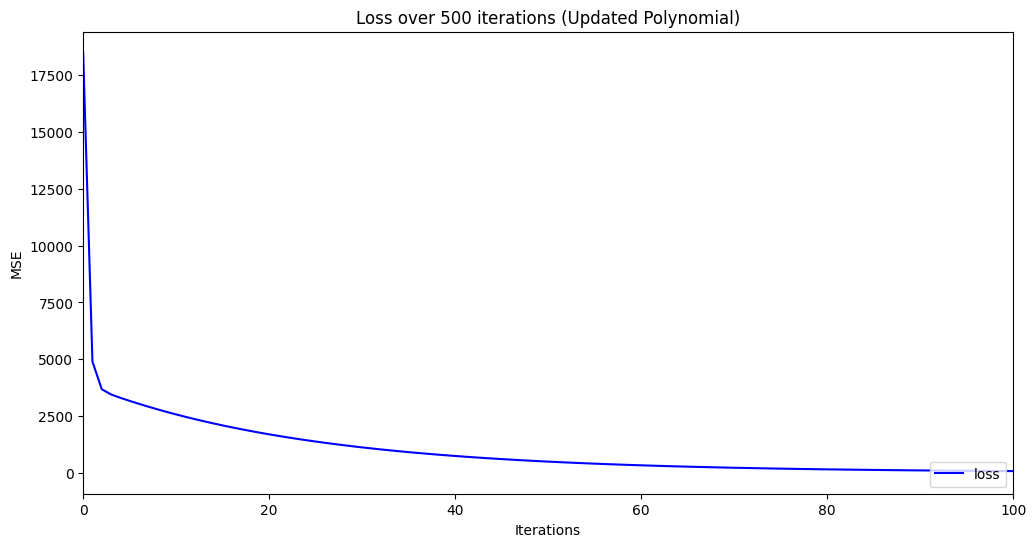

In [18]:
# Update the coefficients for a different polynomial
coeffs = [2, -3, 1]  # New polynomial: y = 2x^2 - 3x + 1

# Generate new jittered data based on the updated coefficients
xs = []
ys = []
for x in hundred_xs:
    y = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

# Perform gradient descent on the updated data
GD_new = gradient_descent(30000, 0.0003)

# Plot the updated predictions vs. the original data
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD_new[2], 'b.', label='final_prediction')
plt.title('Original vs Final prediction after Gradient Descent (Updated Polynomial)')
plt.legend(loc="lower right")
plt.show()

# Print the results
print(f"Final Coefficients predicted: {GD_new[1]}")
print(f"Original Coefficients: {coeffs}")

# Plot the updated loss over iterations
plt.figure(figsize=(12, 6))
plt.plot(GD_new[3], 'b-', label='loss')
plt.title('Loss over 500 iterations (Updated Polynomial)')
plt.legend(loc="lower right")
plt.xlim((0, 100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

- For a high learning rate ( lr = 0.1 )

<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-12-bad7532be911>:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-12-bad7532be911>:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-12-bad7532be911>:37: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


[33548518505.333927, 6088321964498633.0, 1.1049018973953437e+21, 2.0051636739824597e+26, 3.6389487328582684e+31, 6.60392368572634e+36, 1.1984727251884575e+42, 2.1749749715084282e+47, 3.9471203868608867e+52, 7.163190175732321e+57, 1.2999677857435561e+63, 2.35916707851225e+68, 4.281390173951553e+73, 7.769819267386724e+78, 1.4100581585661617e+84, 2.5589578626166996e+89, 4.643968266746187e+94, 8.427821957369993e+99, 1.5294717548725617e+105, 2.7756683290008122e+110, 5.037252010750655e+115, 9.141548921641406e+120, 1.6589981304967474e+126, 3.0107313548101827e+131, 5.463841775471451e+136, 9.915719281858405e+141, 1.7994937063882077e+147, 3.2657011632583003e+152, 5.926558147909333e+157, 1.0755451807937636e+163, 1.9518874312180078e+168, 3.542263600061053e+173, 6.428460582118496e+178, 1.1666298763067504e+184, 2.1171869235339963e+189, 3.8422472801517206e+194, 6.972867628140837e+199, 1.265428261495302e+205, 2.296485134076717e+210, 4.167635678377755e+215, 7.563378874068071e+220, 1.3725935856026166e+2

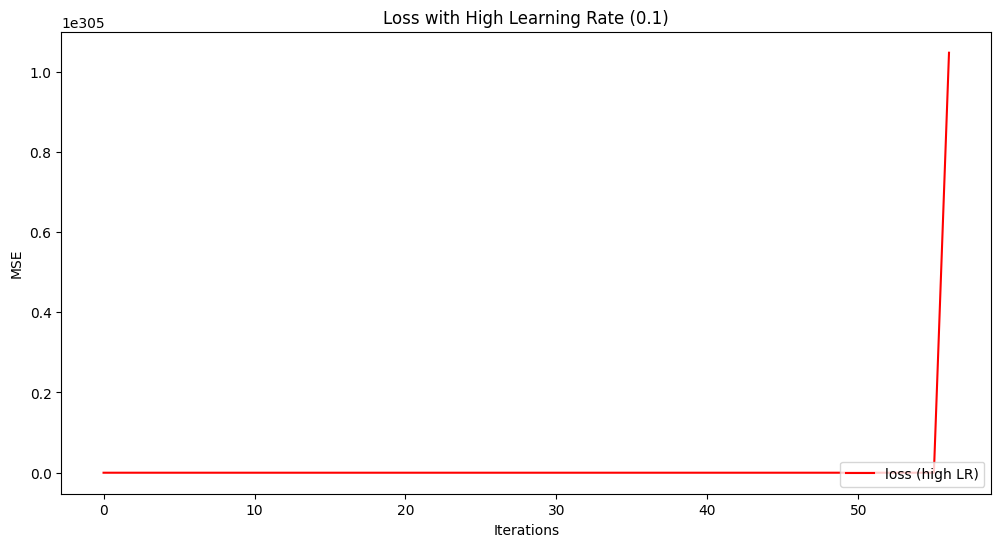

Final Coefficients with High LR: (nan, nan, nan)
Final Loss with High LR: nan


In [19]:
# Gradient descent with a high learning rate
GD_high_lr = gradient_descent(300, 0.1)  # Fewer iterations for observation

# Plot the loss over iterations for high learning rate
plt.figure(figsize=(12, 6))
plt.plot(GD_high_lr[3], 'r-', label='loss (high LR)')
plt.title('Loss with High Learning Rate (0.1)')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

print(f"Final Coefficients with High LR: {GD_high_lr[1]}")
print(f"Final Loss with High LR: {GD_high_lr[0]}")

- For a low learning rate ( lr = 0.00001 )

[173472.23707226102, 159307.7187817682, 146326.5726313051, 134429.89614131267, 123527.05283937957, 113534.98140919738, 104377.56257902145, 95985.03892392153, 88293.48315942897, 81244.31087379555, 74783.83398480379, 68862.8515174776, 63436.27458351085, 58462.78270392539, 53904.50885537292, 49726.75083943575, 45897.70677491865, 42388.23269699676, 39171.62041558614, 36223.39393972529, 33521.12291626904, 31044.251660883798, 28773.942478180612, 26692.932076737678, 24785.39998457607, 23036.847962122556, 21433.989493518373, 19964.648513952656, 18617.66660109779, 17382.817923239512, 16250.731295817757, 15212.818752275758, 14261.210084769124, 13388.692855789493, 12588.657423458204, 11855.046561460835, 11182.309289614412, 10565.35856315398, 9999.532498236897, 9480.558838116845, 9004.522389141483, 8567.835178363135, 8167.209105297718, 7799.630879377397, 7462.339052064697, 7152.802968561932, 6868.703478681143, 6607.915259848534, 6368.490617505586, 6148.644639429789, 5946.74159081811, 5761.28244643

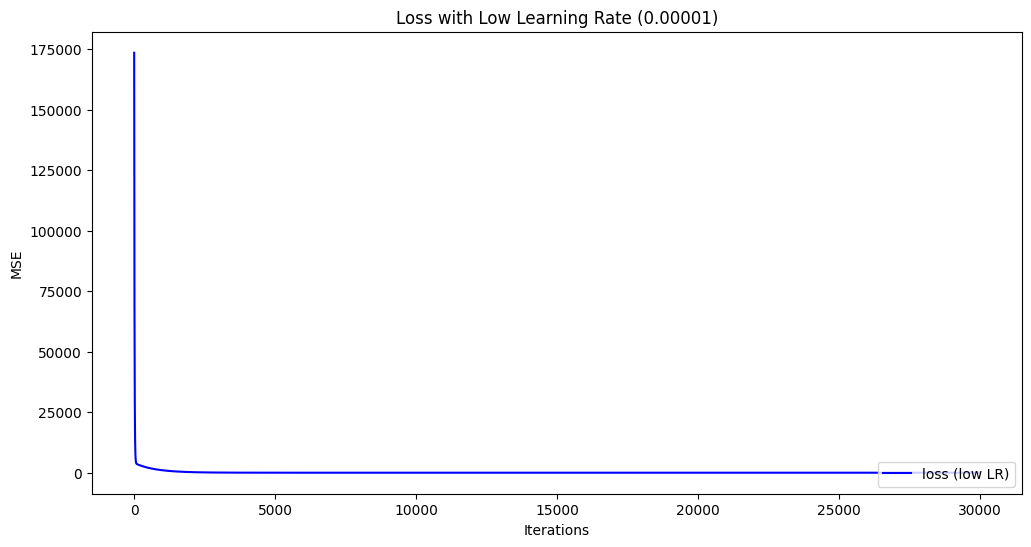

Final Coefficients with Low LR: (2.076378261232937, -2.991582416649525, -3.579756857963769)
Final Loss with Low LR: 8.702871914345774


In [20]:
# Gradient descent with a low learning rate
GD_low_lr = gradient_descent(30000, 0.00001)  # Large number of iterations for observation

# Plot the loss over iterations for low learning rate
plt.figure(figsize=(12, 6))
plt.plot(GD_low_lr[3], 'b-', label='loss (low LR)')
plt.title('Loss with Low Learning Rate (0.00001)')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

print(f"Final Coefficients with Low LR: {GD_low_lr[1]}")
print(f"Final Loss with Low LR: {GD_low_lr[0]}")

- Observations :
  - High Learning Rate: The model might diverge (loss increases) or oscillate without convergence due to large updates.
  - Low Learning Rate: The model converges but takes significantly more iterations to reach an optimal solution.

3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?


[176536.21213363594, 162213.35906354128, 149087.3550589458, 137058.1709305233, 126034.13766399969, 115931.24769880109, 106672.5146039892, 98187.3862707904, 90411.20714894311, 83284.72542791095, 76753.64140658936, 70768.1936090782, 65282.7794918057, 60255.60785094912, 55648.38028072498, 51425.99925455442, 47556.30060403346, 44009.80835660463, 40759.510063248184, 37780.650903692, 35050.54499976385, 32548.40249867543, 30255.171108228915, 28153.3908760924, 26227.061106239893, 24461.518398163942, 22843.3248792485, 21360.16577838508, 20000.75556011551, 18754.75190383512, 17612.6768723869, 16565.84466917641, 15606.295433156218, 14726.73456705064, 13920.477136367326, 13181.396915392426, 12503.879691787115, 11882.780473862465, 11313.38427435734, 10791.370171804503, 10312.778375552882, 9873.980043408275, 9471.649621835875, 9102.73949789572, 8764.45676970234, 8454.241958348079, 8169.749499027618, 7908.829862662824, 7669.513171754914, 7449.994185580498, 7248.618540285211, 7063.870138994018, 6894.3

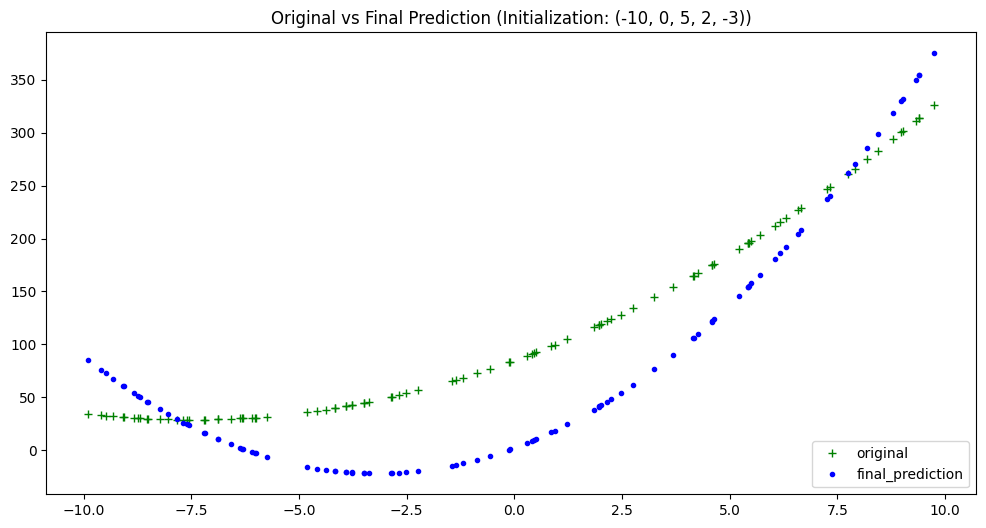

Initialization: (-10, 0, 5, 2, -3)
Final Coefficients: (2.3753992433207842, 15.146349891219721, 2.2828339432565943)
Final Loss: 2822.516085080959
[176536.21213363594, 162213.35906354128, 149087.3550589458, 137058.1709305233, 126034.13766399969, 115931.24769880109, 106672.5146039892, 98187.3862707904, 90411.20714894311, 83284.72542791095, 76753.64140658936, 70768.1936090782, 65282.7794918057, 60255.60785094912, 55648.38028072498, 51425.99925455442, 47556.30060403346, 44009.80835660463, 40759.510063248184, 37780.650903692, 35050.54499976385, 32548.40249867543, 30255.171108228915, 28153.3908760924, 26227.061106239893, 24461.518398163942, 22843.3248792485, 21360.16577838508, 20000.75556011551, 18754.75190383512, 17612.6768723869, 16565.84466917641, 15606.295433156218, 14726.73456705064, 13920.477136367326, 13181.396915392426, 12503.879691787115, 11882.780473862465, 11313.38427435734, 10791.370171804503, 10312.778375552882, 9873.980043408275, 9471.649621835875, 9102.73949789572, 8764.456769

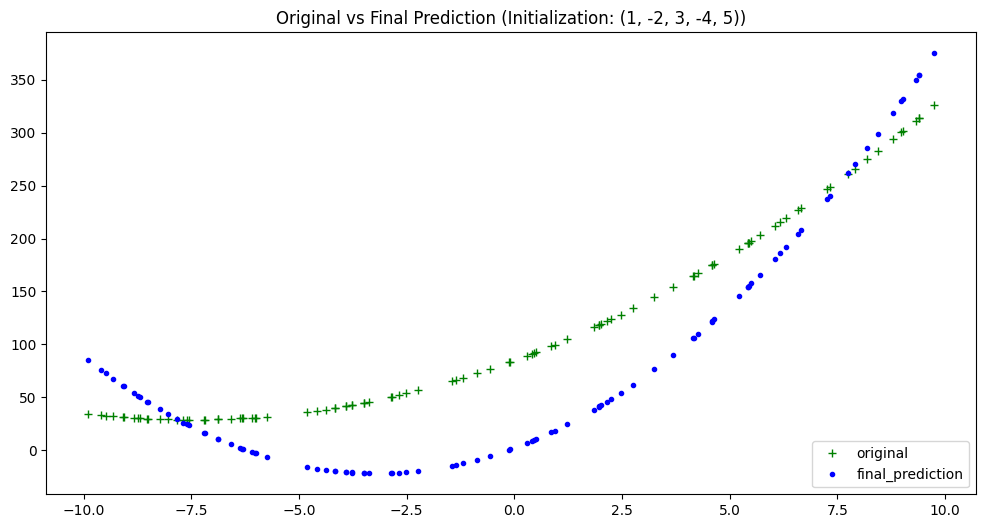

Initialization: (1, -2, 3, -4, 5)
Final Coefficients: (2.3753992433207842, 15.146349891219721, 2.2828339432565943)
Final Loss: 2822.516085080959
[176536.21213363594, 162213.35906354128, 149087.3550589458, 137058.1709305233, 126034.13766399969, 115931.24769880109, 106672.5146039892, 98187.3862707904, 90411.20714894311, 83284.72542791095, 76753.64140658936, 70768.1936090782, 65282.7794918057, 60255.60785094912, 55648.38028072498, 51425.99925455442, 47556.30060403346, 44009.80835660463, 40759.510063248184, 37780.650903692, 35050.54499976385, 32548.40249867543, 30255.171108228915, 28153.3908760924, 26227.061106239893, 24461.518398163942, 22843.3248792485, 21360.16577838508, 20000.75556011551, 18754.75190383512, 17612.6768723869, 16565.84466917641, 15606.295433156218, 14726.73456705064, 13920.477136367326, 13181.396915392426, 12503.879691787115, 11882.780473862465, 11313.38427435734, 10791.370171804503, 10312.778375552882, 9873.980043408275, 9471.649621835875, 9102.73949789572, 8764.4567697

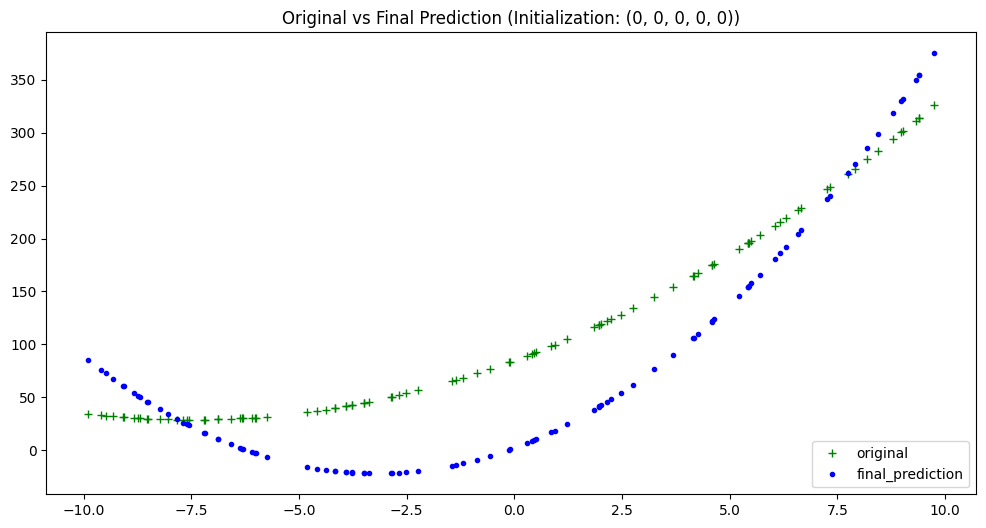

Initialization: (0, 0, 0, 0, 0)
Final Coefficients: (2.3753992433207842, 15.146349891219721, 2.2828339432565943)
Final Loss: 2822.516085080959
Init 1: (-10, 0, 5, 2, -3), Final Loss: 2822.516085080959, Final Coefficients: (2.3753992433207842, 15.146349891219721, 2.2828339432565943)
Init 2: (1, -2, 3, -4, 5), Final Loss: 2822.516085080959, Final Coefficients: (2.3753992433207842, 15.146349891219721, 2.2828339432565943)
Init 3: (0, 0, 0, 0, 0), Final Loss: 2822.516085080959, Final Coefficients: (2.3753992433207842, 15.146349891219721, 2.2828339432565943)


In [21]:
# Define coefficients for a degree 5 polynomial: (x - 1)(x + 2)(x - 3)(x + 4)(x - 5)
coeffs = np.poly([-1, -2, -3, -4, -5])  # Coefficients for the polynomial with these roots

# Generate data for the degree 5 polynomial
xs = []
ys = []
for x in hundred_xs:
    y = eval_2nd_degree_jitter(coeffs, x, 0.1)  # Using the same jitter function
    xs.append(x)
    ys.append(y)

# Try different initializations
initializations = [
    (-10, 0, 5, 2, -3),   # Example 1: Random large/small values
    (1, -2, 3, -4, 5),    # Example 2: Close to actual coefficients
    (0, 0, 0, 0, 0)       # Example 3: All zero initialization
]

# Perform gradient descent for each initialization
results = []
for init in initializations:
    GD_result = gradient_descent(10000, 0.00001)  # Fixed learning rate for observation
    results.append(GD_result)
    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys, 'g+', label='original')
    plt.plot(xs, GD_result[2], 'b.', label='final_prediction')
    plt.title(f'Original vs Final Prediction (Initialization: {init})')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Initialization: {init}")
    print(f"Final Coefficients: {GD_result[1]}")
    print(f"Final Loss: {GD_result[0]}")

# Compare results
for i, (init, result) in enumerate(zip(initializations, results)):
    print(f"Init {i+1}: {init}, Final Loss: {result[0]}, Final Coefficients: {result[1]}")

In the case of $x^2$, the gradient descent loss landscape is convex because it's a simple quadratic function. A convex landscape ensures a single global minimum regardless of the initialization. For higher-degree polynomials, the landscape can have multiple local minima due to its complexity, making the results depend more on initialization.

4. Can you modify the algorithm to find a maxima of a function, instead of a minima?

<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-9-268da0813d70>:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-9-268da0813d70>:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)


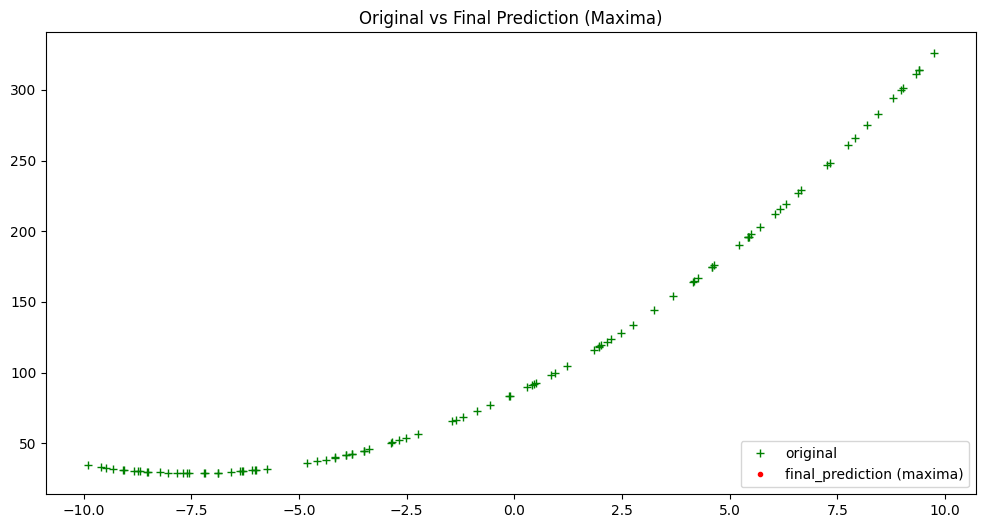

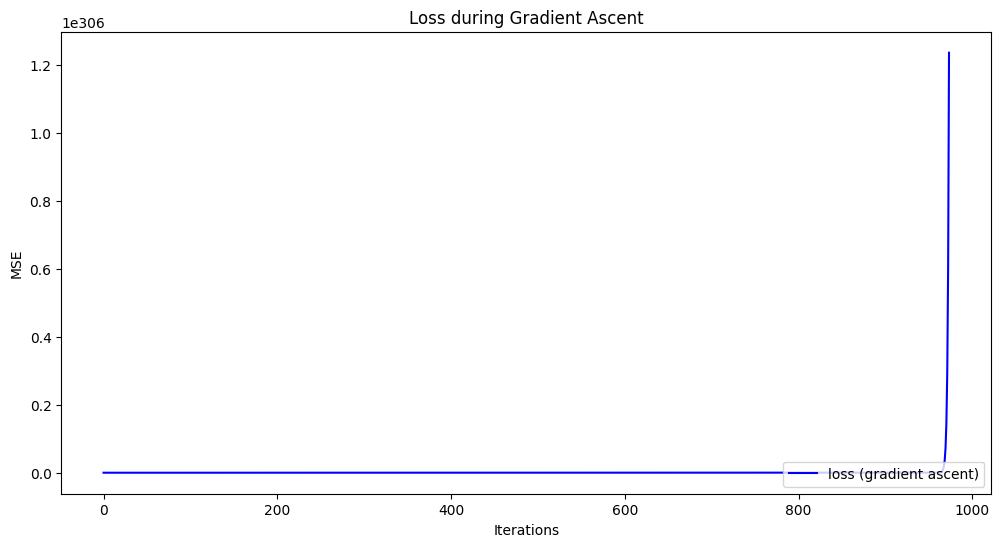

Final Coefficients (Maxima): (nan, nan, nan)
Final Loss (Maxima): nan


In [22]:
def gradient_ascent(epochs, lr):
    """
    Perform gradient ascent for a second degree polynomial to find maxima.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs  # Start with random coefficients
    for i in range(epochs):
        grad_result = calc_gradient_2nd_poly(rand_coeffs_to_test, hundred_xs, ys)
        rand_coeffs_to_test = (
            rand_coeffs_to_test[0] + lr * grad_result[0],  # Add gradients for ascent
            rand_coeffs_to_test[1] + lr * grad_result[1],
            rand_coeffs_to_test[2] + lr * grad_result[2],
        )
        new_y_bar = eval_2nd_degree(rand_coeffs_to_test, hundred_xs)
        loss = loss_mse(ys, new_y_bar)  # Loss calculation remains the same
        losses.append(loss)
    return loss, rand_coeffs_to_test, new_y_bar, losses

# Perform gradient ascent
GA = gradient_ascent(10000, 0.0001)

# Plot the final predictions vs original data
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GA[2], 'r.', label='final_prediction (maxima)')
plt.title('Original vs Final Prediction (Maxima)')
plt.legend(loc="lower right")
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(12, 6))
plt.plot(GA[3], 'b-', label='loss (gradient ascent)')
plt.title('Loss during Gradient Ascent')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

# Display results
print(f"Final Coefficients (Maxima): {GA[1]}")
print(f"Final Loss (Maxima): {GA[0]}")

## **Additional Critical Thinking Questions**

1. **You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.**

- It is not necessary to shuffle the training data when performing full-batch gradient descent because all training examples are used simultaneously to compute the gradient. Shuffling the data would not change the computed gradient, as it is calculated over the entire dataset in one go.

- Shuffling is primarily important in stochastic gradient descent (SGD) or mini-batch gradient descent to ensure that the model does not overfit to patterns within a specific order of data (e.g., sorted data).

2. **You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.**

  Yes, your friend is correct. Shuffling the training set is crucial when using mini-batch gradient descent in this scenario because:

  1. Class Mixing in Mini-Batches: If the data is not shuffled, mini-batches might only contain examples of one class (e.g., only dogs or only cats). This results in biased gradient updates that do not generalize well across both classes.
  2. Better Gradient Estimates: Shuffling ensures that each mini-batch contains a mix of both classes, leading to gradients that better approximate the overall dataset gradient.
  3. Avoiding Cyclic Patterns: Without shuffling, the model might learn patterns specific to the ordering of the data (e.g., seeing only dogs first and then cats), which could harm its ability to generalize.